# **数科导报告**

##### 一、问题简述

##### &emsp;&emsp;本小组报告的选题为：发展中国家应更多地承担气候变化和减排的责任。在探究的过程中，我们聚焦于现在发展中国家的问题结合相关文献，提出了以下几个问题，并基于已有的数据进行分析：    

> 1.&emsp;发展中国家单位GDP产生的碳排放与发达国家的相比如何？   
> 2.&emsp;发展中国家的能源结构、工业构成等相对落后，是否引发更多的温室气体的排放？  
> 3.&emsp;发展中国家实行节能减排政策前后的碳排放量变化如何？

## 二、数据简要

### &emsp;&emsp; 1.使用的数据
我们使用了以下数据:
     
   
#### 二氧化碳排放量：此数据来自全球碳项目。全球碳项目通常每年都会发布新的二氧化碳排放量更新。
#### 温室气体排放（包括甲烷和一氧化二氮）：此数据来源于CAIT气候数据浏览器，并从气候观察门户网站下载
#### 能源（一次能源、能源结构和能源强度）：这些数据来白两个来源的组合。BP世界能源统计评论每年发布一次，但并末提供所有国家的一次
#### 能源消费数据：对于没有出现在该数据集中的国家，我们通过将世界银行《世界发展指标》指标乘以总人口数宇来计算一次能源。世界银行从国际能源署获取这一指标。Energyuse per capita
#### 其他变量：这些数据是从各种来源(联合国、世界银行、Gapminder、麦迪逊项目数据库等）收集的。更多信息可在我们的密码本中找到。

### &emsp;&emsp; 2.数据处理
&emsp;&emsp;&emsp;&emsp;  我们主要将数据中包括的国家分为发达国家与发展中国家两部分，在不同的时间轴上通过比较法来分析问题。   




## 三、问题探究

#### 1、发展中国家单位GDP产生的碳排放与发达国家的比较

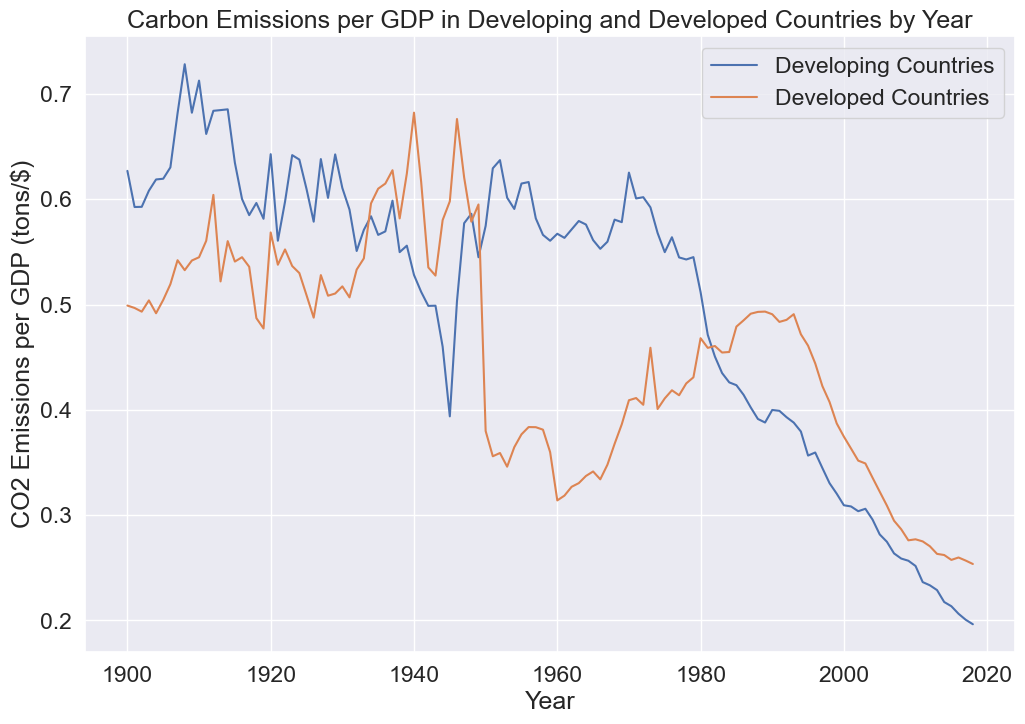

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

#发达国家集合
developed_countries = {"United States", "Canada", "United Kingdom", "Australia", "New Zealand",
                    "Japan", "South Korea", "Germany", "France", "Italy", "Spain", "Netherlands",
                    "Sweden", "Norway", "Denmark", "Switzerland", "Austria", "Belgium", "Finland",
                    "Ireland", "Iceland", "Luxembourg", "Singapore", "Hong Kong", "Taiwan"}

# 读取数据集并筛选所需列
data = pd.read_csv("owid-co2-data.csv")
data = data[["country", "year", "co2_per_gdp"]]
data = data.loc[data["year"] >= 1900]
data = data.dropna()

# 按国家、年份、碳排放强度排序
data = data.sort_values(by=["country", "year", "co2_per_gdp"])

# 将数据分成发展中国家和发达国家
developing_countries = data[data["country"].isin(developed_countries)]
developed_countries = data[~data["country"].isin(developed_countries)]

# 按年份和碳排放强度分组，并计算平均值
devd_df = developed_countries.groupby(["year"])["co2_per_gdp"].mean().reset_index()
devp_df = developing_countries.groupby(["year"])["co2_per_gdp"].mean().reset_index()

# 绘制发展中国家和发达国家的碳排放强度与单位 GDP 的关系图
plt.plot(devp_df["year"], devp_df["co2_per_gdp"], label="Developing Countries")
plt.plot(devd_df["year"], devd_df["co2_per_gdp"], label="Developed Countries")

plt.xlabel("Year")
plt.ylabel("CO2 Emissions per GDP (tons/$)")
plt.title("Carbon Emissions per GDP in Developing and Developed Countries by Year")
plt.legend()
plt.show()


C:\Users\HBW\AppData\Local\Temp\ipykernel_13920\1067038284.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_developed['country_type'] = 'Developed'
C:\Users\HBW\AppData\Local\Temp\ipykernel_13920\1067038284.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_developing['country_type'] = 'Developing'


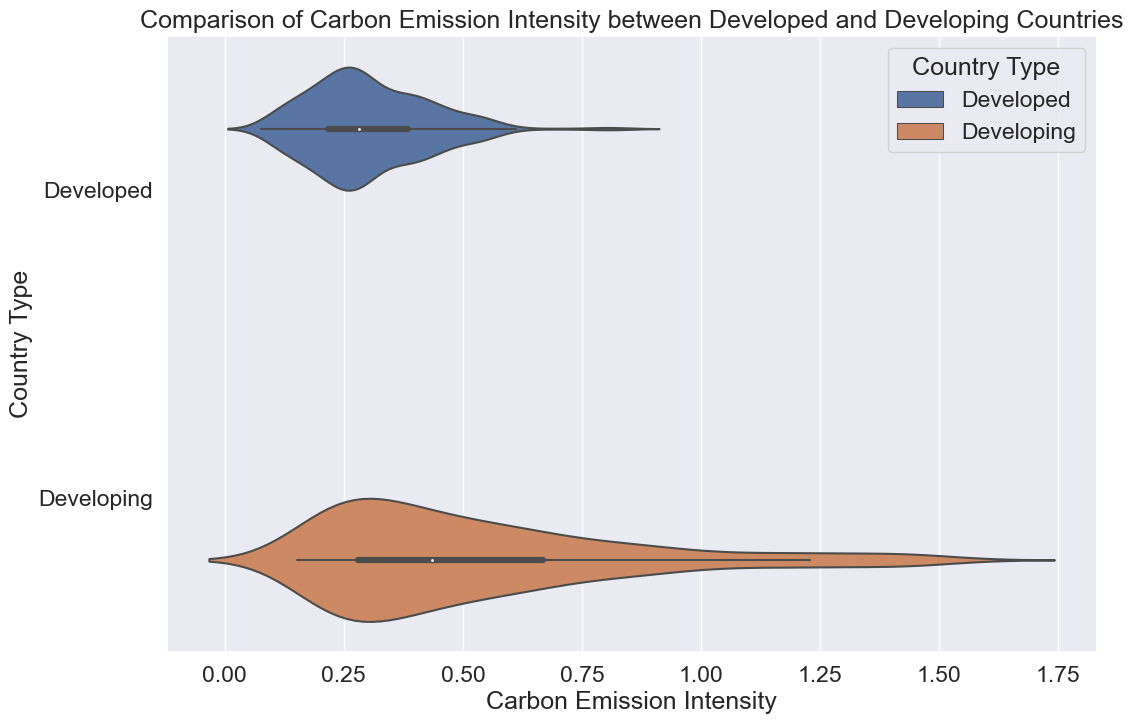

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 读取数据集
df = pd.read_csv('owid-co2-data.csv')

# 剔除包含 null 值的行
df = df.dropna()

# 选取发展中国家和发达国家数据
developed_countries = {"United States", "Canada", "United Kingdom", "Australia", "New Zealand",
                       "Japan", "South Korea", "Germany", "France", "Italy", "Spain", "Netherlands",
                       "Sweden", "Norway", "Denmark", "Switzerland", "Austria", "Belgium", "Finland",
                       "Ireland", "Iceland", "Luxembourg", "Singapore", "Hong Kong", "Taiwan"}

df_developed = df[df['country'].isin(developed_countries)]
df_developing = df[~df['country'].isin(developed_countries)]

# 设置图形尺寸和字体大小
sns.set(rc={'figure.figsize':(12,8)})
sns.set(font_scale=1.5)

# 将 "country" 列中的值替换为 "Developed" 或 "Developing"
df_developed['country_type'] = 'Developed'
df_developing['country_type'] = 'Developing'
df_combined = pd.concat([df_developed, df_developing], ignore_index=True)

# 绘制小提琴图
ax = sns.violinplot(x='co2_per_gdp', y='country_type', hue='country_type',
                    data=df_combined)

ax.set_xlabel('Carbon Emission Intensity')
ax.set_ylabel('Country Type')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:2], labels[:2], title='Country Type')
plt.title('Comparison of Carbon Emission Intensity between Developed and Developing Countries')
plt.show()


C:\Users\HBW\AppData\Local\Temp\ipykernel_13920\3580888325.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  developed['year'] = pd.to_datetime(developed['year'], format='%Y')
C:\Users\HBW\AppData\Local\Temp\ipykernel_13920\3580888325.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  developing['year'] = pd.to_datetime(developing['year'], format='%Y')


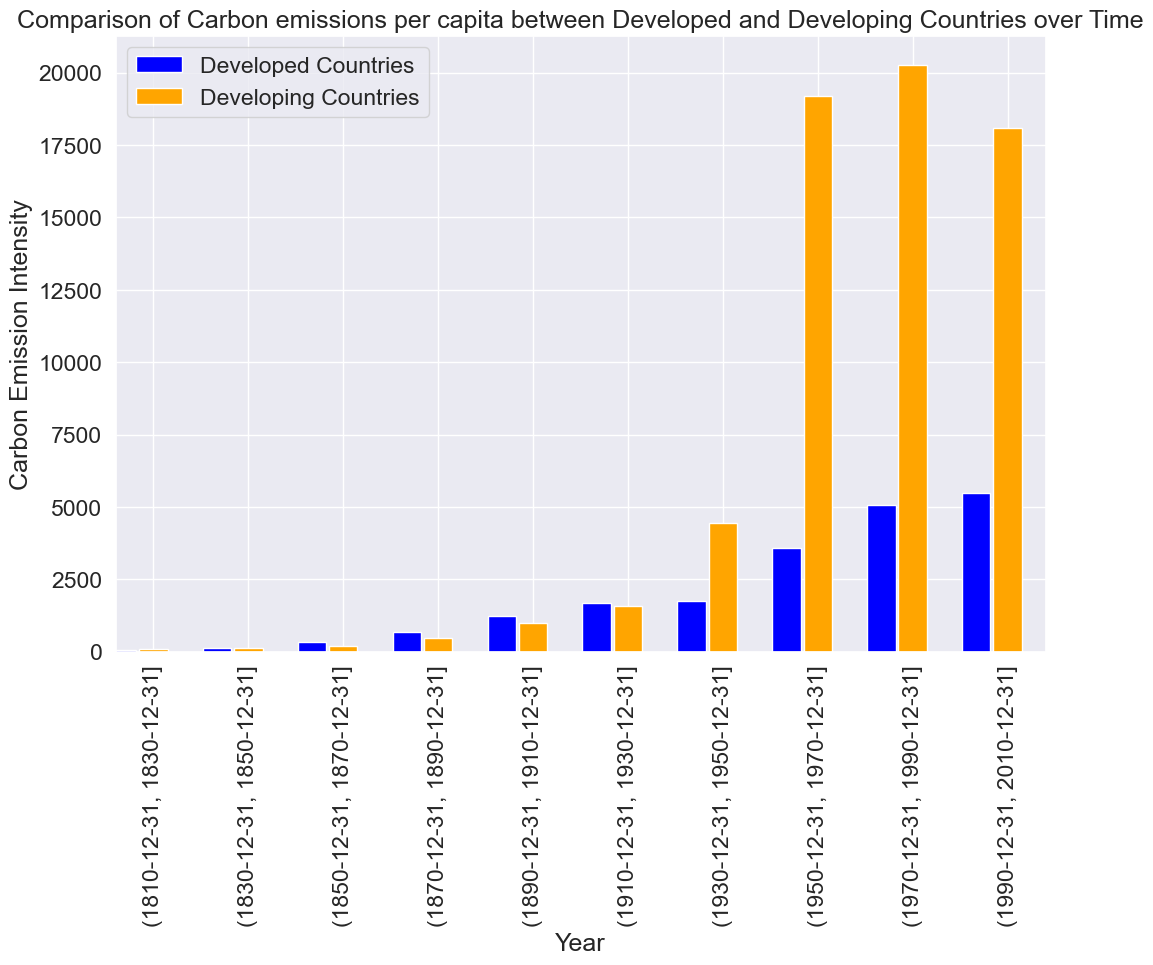

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('owid-co2-data.csv')

# 根据国家名称将国家分为发达国家和发展中国家
developed_country = {"United States", "Canada", "United Kingdom", "Australia", "New Zealand",
                    "Japan", "South Korea", "Germany", "France", "Italy", "Spain", "Netherlands",
                    "Sweden", "Norway", "Denmark", "Switzerland", "Austria", "Belgium", "Finland",
                    "Ireland", "Iceland", "Luxembourg", "Singapore", "Hong Kong", "Taiwan"}

df["country_type"] = np.where(df["country"].isin(developed_country), "developed", "developing")

# 将数据按照国家分类
developed = df[df['country_type'] == 'developed']
developing = df[df['country_type'] == 'developing']

# 将 year 列转换为 datetime 类型
developed['year'] = pd.to_datetime(developed['year'], format='%Y')
developing['year'] = pd.to_datetime(developing['year'], format='%Y')

# 将数据按照每 20 年分组
bins = pd.date_range(start='1810-01-01', end='2021-01-01', freq='20Y')
developed_grouped = developed.groupby(pd.cut(developed['year'], bins)).sum()
developing_grouped = developing.groupby(pd.cut(developing['year'], bins)).sum()

# 创建堆积柱状图
ax = developed_grouped.plot(kind='bar', stacked=True, y='co2_per_capita', color='blue', position=1.6, width=0.3)
developing_grouped.plot(kind='bar', stacked=True, y='co2_per_capita', ax=ax, color='orange', width=0.3)

ax.set_xlabel('Year')
ax.set_ylabel('Carbon Emission Intensity')

ax.legend(['Developed Countries', 'Developing Countries'])
plt.title('Comparison of Carbon emissions per capita between Developed and Developing Countries over Time')
plt.show()


In [18]:
# from PIL import Image, ImageDraw, ImageFont
# import pandas as pd
# import matplotlib.pyplot as plt
# from selenium import webdriver
# import seaborn as sns
# import folium
# import time
# import imageio
#
# #
# # 读取数据
# data = pd.read_csv("owid-co2-data.csv")
#
# for i in range(1900,2021):
#     # 创建地图对象
#     map = folium.Map(location=[30, 0], zoom_start=2, name="CO2 Emissions " + "in Year:" + str(i))
#     tempdata = data[data['year'] == i]
#     # 生成 threshold_scale,一般会根据排放量的分布情况、数据的可靠性以及政策等因素来决定划分区间
#     if(tempdata['co2'].max() < 20000):
#         threshold_scale = [0,tempdata['co2'].max()/10000 , tempdata['co2'].max()/1000, tempdata['co2'].max()/100,tempdata['co2'].max()/10,tempdata['co2'].max()/8,tempdata['co2'].max()/6,tempdata['co2'].max()/5,tempdata['co2'].max()/4,tempdata['co2'].max()/3,tempdata['co2'].max()/2,tempdata['co2'].max()]
#     else:
#         threshold_scale = [0, 0.1, 1, 10, 100, 1000, 5000, 7000, 10000, 20000, tempdata['co2'].max()]
#     # 创建热力图
#     folium.Choropleth(
#         geo_data="world.json",
#         name="CO2 Emissions " + "in Year:" + str(i),
#         data=tempdata,
#         columns=["country", "co2"],
#         key_on="feature.properties.name",
#         fill_color="YlOrRd",
#         fill_opacity=0.7,
#         line_opacity=0.2,
#         legend_name="Year:" + str(i),
#         threshold_scale=threshold_scale
#     ).add_to(map)
#
#     # 添加图例
#     folium.LayerControl().add_to(map)
#     map.save(str(i) + "map.html")
#
# #存储绝对路径
# path = "C:\\Users\\HBW\\Desktop\\co2-data\\"
# for i in range(1900,2021):
#     # 启动Chrome浏览器
#     driver = webdriver.Chrome()
#     driver.get(path+str(i)+"map.html")
#     time.sleep(2)
#
#     # 截屏并保存为PNG文件
#     driver.save_screenshot(str(i)+"map.png")
#     driver.quit()
#     image = Image.open(path+str(i)+"map.png")
#     width, height = image.size
#
#     # 创建一个Draw对象
#     draw = ImageDraw.Draw(image)
#     font = ImageFont.truetype('arial.ttf', size=100)
#     title = str(i)
#     title_width, title_height = draw.textsize(title, font=font)
#     title_x = width - title_width - 20
#     title_y = height - title_height - 20
#     draw.text((title_x, title_y), title, fill='black', font=font)
#     image.save(str(i)+"map.png")
#
# # 设置文件名和帧速率
# filename = "co2_maps.gif"
# fps = 1
#
# # 打开一个imageio写入器
# with imageio.get_writer(filename, mode='I', fps=fps) as writer:
#     # 循环添加每个PNG文件
#     for i in range(1900,2021):
#         frame = imageio.imread(str(i)+'map.png')
#         writer.append_data(frame)
#
# print("GIF animation saved to", filename)

![co2_map](co2_map.gif)

### 总结

1. 由图一，在1900年到1980年间，全球进入高速发展的时代，排除二战时间，发展中国家碳排放强度都高于发达国家。因此，发展中国家应该更多承担气候变化和减排的责任。
2. 由图二，发展中国家碳排放强度的中位数与平均数都显著高于发达国家，代表着发展中国家生产和消费方式更加碳密集，而发达国家则采用更多的低碳技术和能源替代品，在减少碳排放上做出了更大的努力。因此，发展中国家应该更多承担气候变化和减排的责任。
3.  由图三，近现代发展中国家人均碳排放量上显著高于发达国家，而在90年代后出现下降趋势，因此，发展中国家应该更多承担气候变化和减排的责任。
4.  由图四，我们可以发现1990年之前，发达国家排放量较多，但在1990年之后，发展中国家的二氧化碳排放量急剧增加，因此，发展中国家应该更多承担气候变化和减排的责任


#### 2、发展中国家的能源结构、工业构成等相对落后，引发更多的温室气体的排放

##### 根据事实情况分析，发展中国家的能源结构、工业构成等相对落后：

- 发展中国家的能源结构以化石能源为主，尤其是煤炭的比重较高，而清洁能源和可再生能源的开发利用水平较低，导致能源利用效率低下，污染物和温室气体排放量大。
- 发展中国家的工业构成以重工业为主，高耗能、高污染的产业占据主导地位，而高附加值、高技术含量的产业比重较小，导致工业生产过程中消耗大量能源，同时也排放大量温室气体。

这些原因使得发展中国家在能源领域面临着巨大的挑战和压力，也给全球气候变化带来了严重的影响。


针对这些原因，接下来将从三个角度进行数据分析，以验证这一表述：
- 发展中国家能源结构

- 发展中国家工业结构

- 温室气体排放数据

(1)1990-2019年间 11个发展中国家以及全球的每年平均CO2排放量折线图

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# 读取数据文件，将第一列设置为索引列
data_co2 = pd.read_excel("data/useful/CO2 emissions(total_all)_developing.xlsx", index_col=0)
#删除数据无效列
data_co2=data_co2.drop(2020,axis=1)
data_co2=data_co2.drop(2021,axis=1)

In [ ]:
# 计算1990-2019年间各国的平均CO2排放量
data_co2["Mean CO2 emissions"] = data_co2.mean(axis=1)


In [ ]:
#计算各发展中国家的对应总量占比
data_co2['proportion']=round(data_co2["Mean CO2 emissions"]/data_co2["Mean CO2 emissions"]['World']*100,2)
data_co2.columns[0:-2]

Index([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019],
      dtype='object')

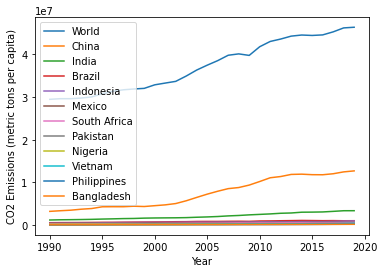

In [ ]:
import matplotlib.pyplot as plt

# 提取国家和年份信息
countries = data_co2.index.unique()
years = data_co2.columns[0:-2]

# 循环绘制每个国家的CO2变化图
for country in countries:
    # 提取当前国家的CO2数据
    co2 = data_co2[data_co2.index == country].iloc[:, 0:-2].values.tolist()[0]
    # 绘制折线图
    plt.plot(years, co2, label=country)
# 添加图例和标签
plt.legend()
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (metric tons per capita)')

# 显示图形
plt.show()

(2)可拉伸的CO2排放量各国家的比较

In [ ]:
#尝试绘制了可拉伸的CO2排放量各国家的比较
import plotly.graph_objs as go

# 从数据中提取国家和 CO2 数值
countries = data_co2.index.tolist()
countries=countries[:-1]
co2_values = data_co2.iloc[:-1, 0:-2].values.tolist()
# 创建 plotly 数据
traces = []
for i in range(len(countries)):
    traces.append(go.Scatter(
        x = list(range(1990, 2021)),
        y = co2_values[i],
        mode = 'lines',
        name = countries[i]
    ))

# 创建布局
layout = go.Layout(
    title = 'CO2 emissions per capita from 1990 to 2019',
    xaxis = dict(title = 'Year'),
    yaxis = dict(title = 'CO2 emissions'),
)

# 创建 Figure 对象
fig = go.Figure(data=traces, layout=layout)

# 显示图表
fig.show()


(3)取11个发展中国家里的CO2排放量前四，其余国家合并记作Other，
基于此处理绘制CO2排放量占比饼状图

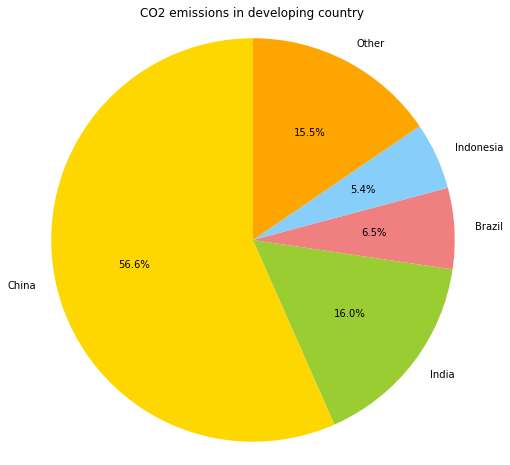

In [ ]:
import matplotlib.pyplot as plt

# 按照 CO2 排序
data_co2 = data_co2.sort_values(by='proportion', ascending=False)

# 取前四个国家
top_4_countries = data_co2.index[1:5].tolist()
top_4_emissions = data_co2['proportion'][1:5].tolist()

# 计算其他国家的总 CO2 排放量
other_emissions = data_co2['proportion'][5:].sum()

# 将其他国家加入前四
top_4_countries.append('Other')
top_4_emissions.append(other_emissions)
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'orange']
# 绘制饼状图
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(top_4_emissions, labels=top_4_countries,colors=colors, autopct='%1.1f%%', startangle=90)
ax.axis('equal')
plt.title('CO2 emissions in developing country')
plt.show()


In [ ]:
#从此处开始分析前四国家的能源结构，前面用来筛选掉可忽略不计的国家
countries=top_4_countries[:-1]
countries

['China', 'India', 'Brazil', 'Indonesia']

(4)CO2排放前四的发展中国家不可再生能源消耗相较于世界平均水平折线图（合并图）

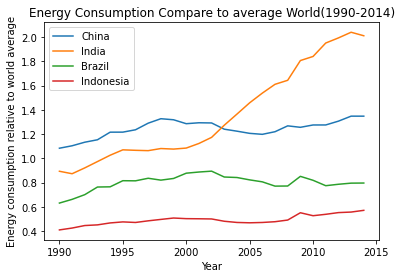

In [ ]:
# 读取数据文件
data_energy = pd.read_excel("data/useful/Energy use (kg of oil equivalent per capita).xlsx")
for year in range(1990,2015):
    data_energy[year]=data_energy[year]/data_energy[year][4]
    
for i in range(4):
    plt.plot(range(1990, 2015), list(data_energy.iloc[i, 1:]), label=countries[i])

    
plt.title("Energy Consumption Compare to average World(1990-2014)")
plt.xlabel("Year")
plt.ylabel("Energy consumption relative to world average")

plt.legend()

plt.show()
#绘制出了各个国家不可再生能源消耗相较于世界平均水平

此图能够反映出发展中国家的不可再生资源消耗量大，而不可再生能源如煤炭、石油等使用将造成大量温室气体排放，将更容易引发环境问题

(5)CO2排放前四的发展中国家不可再生能源消耗相较于世界平均水平折线图

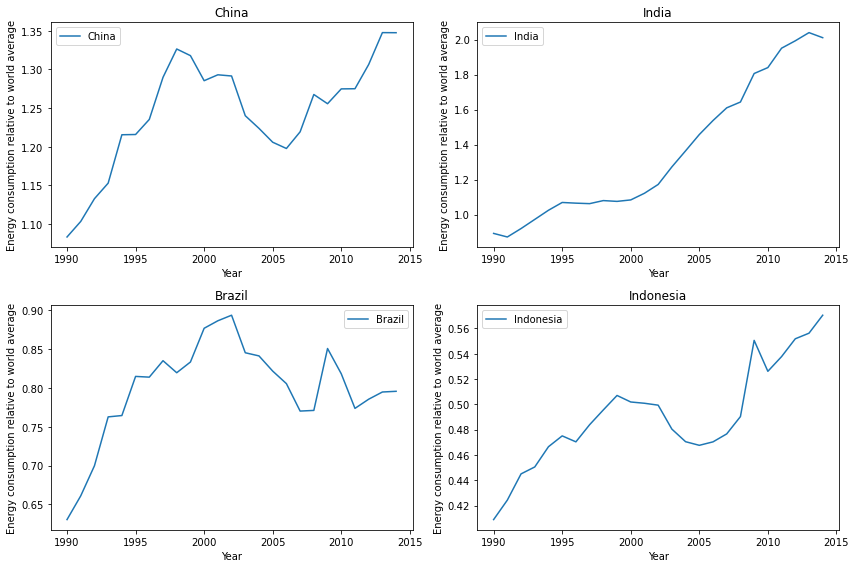

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8)) # 创建2*2的4个子图

for i, ax in enumerate(axs.flatten()): # 循环遍历子图，每个子图绘制一张国家的折线图
    ax.plot(range(1990, 2015), data_energy.iloc[i, 1:], label=countries[i])
    ax.set_title(countries[i]) # 设置每个子图的标题
    ax.set_xlabel('Year')
    ax.set_ylabel('Energy consumption relative to world average')
    ax.legend()

plt.tight_layout() # 调整子图之间的距离
plt.show()

(6)中国、印度（发展中国家）和瑞士（发达国家）可再生能源发电量条形图

In [ ]:
#通过对比中印和瑞士之间可再生能源发电量(占总发电量的百分比)来展示发展中国家与发达国家之间的能源结构差距
#使用 柱状图
data_energy = pd.read_excel("data/useful/Renewable electricity output (% of total electricity output).xlsx")

# 提取中印瑞士的数据
china_data = data_energy[data_energy["Country Name"]=="China"].iloc[:,1:-1].values.tolist()[0]
india_data = data_energy[data_energy["Country Name"]=="India"].iloc[:,1:-1].values.tolist()[0]
switzerland_data = data_energy[data_energy["Country Name"]=="Switzerland"].iloc[:,1:-1].values.tolist()[0]
print(china_data)

[20.40793989, 18.47113079, 17.58468367, 18.12526017, 18.0884357, 19.2141393, 17.55221062, 17.51246602, 18.06115632, 16.68146593, 16.63949819, 18.95851917, 17.6186279, 15.03704033, 16.22326642, 16.17502498, 15.59278342, 15.26334714, 17.73744406, 17.8637982, 18.62282605, 16.76177043, 19.96624894, 20.29622738, 22.60915378]


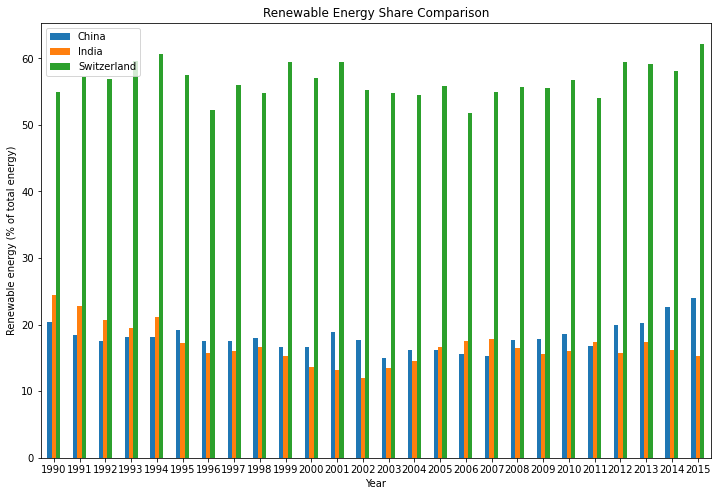

In [ ]:
# 选取中国、印度、瑞士的数据
china_z = np.array(data_energy[data_energy['Country Name'] == 'China'].iloc[:, 1:])
india_z = np.array(data_energy[data_energy['Country Name'] == 'India'].iloc[:, 1:])
switzerland_z = np.array(data_energy[data_energy['Country Name'] == 'Switzerland'].iloc[:, 1:])

# 构建数据
data = {'China': china_z[0], 'India': india_z[0], 'Switzerland': switzerland_z[0]}
index = range(1990, 2016)

# 绘制条形图
df = pd.DataFrame(data, index=index)
ax = df.plot(kind='bar', figsize=(12, 8), rot=0)

# 添加标签
ax.set_xlabel('Year')
ax.set_ylabel('Renewable energy (% of total energy)')
ax.set_title('Renewable Energy Share Comparison')

# 显示图形
plt.show()


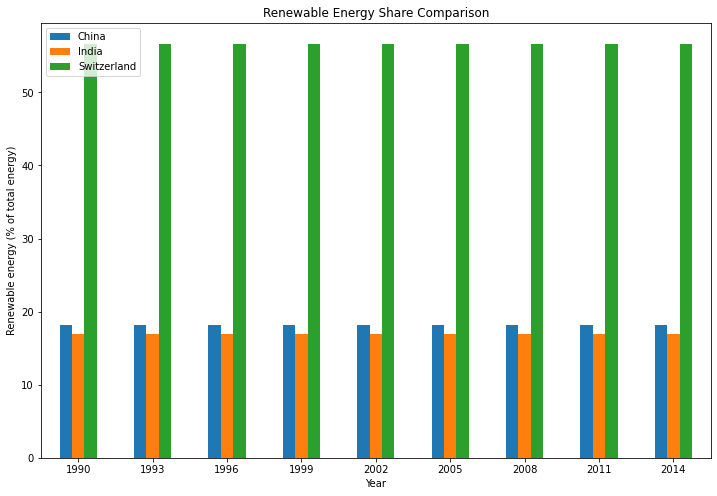

In [ ]:
#上面的图太密集了，改为稀疏一点的
# 选取中国、印度、瑞士的数据
china_z = np.array(data_energy[data_energy['Country Name'] == 'China'].iloc[:, 1:])
india_z = np.array(data_energy[data_energy['Country Name'] == 'India'].iloc[:, 1:])
switzerland_z = np.array(data_energy[data_energy['Country Name'] == 'Switzerland'].iloc[:, 1:])

# 按五年为一个时间段计算平均值
china_z = [np.mean(china_z[i:i+5]) for i in range(0, len(china_z), 5)]
india_z = [np.mean(india_z[i:i+5]) for i in range(0, len(india_z), 5)]
switzerland_z = [np.mean(switzerland_z[i:i+5]) for i in range(0, len(switzerland_z), 5)]

# 构建数据
data = {'China': china_z, 'India': india_z, 'Switzerland': switzerland_z}
index = range(1990, 2016, 3) #可以调整步长

# 绘制条形图
df = pd.DataFrame(data, index=index)
ax = df.plot(kind='bar', figsize=(12, 8), rot=0)

# 添加标签
ax.set_xlabel('Year')
ax.set_ylabel('Renewable energy (% of total energy)')
ax.set_title('Renewable Energy Share Comparison')

# 显示图形
plt.show()


#### 分析与总结
通过对比发展中国家CO2排放情况、不可再生能源使用情况与世界平均水平可知：
- 发展中国家的CO2排放量起初较低，但随着时间呈现逐年增长的趋势。这可能是因为发展中国家经济发展速度较快，能源消耗也随之增加。
- 发展中国家在使用不可再生能源方面相对于世界平均水平使用较多。这可能是因为发展中国家能源结构相对较为单一，主要依靠化石能源来满足能源需求。
- 而对比发达国家，发展中国家在可再生能源使用方面仍然有较大差距，需要加强环境保护和可持续能源发展方面的投入和努力。

因此，发展中国家需要推动能源结构更新、推广可再生能源使用、进行工业结构改革，进而促进环保事业的进行与可持续发展。

### 3、发展中国家实行节能减排政策前后的碳排放量变化

In [ ]:
import csv
import matplotlib.pyplot as plt

#### 中美节能减排政策变迁
为了便于将政策分析与统计数据相结合，我们选区中国与美国两个国家分别作为发达国家和发展中国家的代表。

**中国“节能减排”政策的发展变迁分为三个主要阶段：**

一、初始形成阶段（1980-1994）以行政手段为主，重点关注节约能源

二、发展变革阶段（1995-2007）坚持节能优先，开始重视能源结构调整

三、深化改革阶段（2007-2016）全面完善节能政策体系，调整能源战略，倡导低碳减排

**美国在减少碳排放量方面的政策是摇摆的，主要的时间节点包括：**

1990年：美国通过清洁空气法修正案，将二氧化碳列为受监管的污染物，开始对温室气体排放实施限制。

2001年：美国总统布什宣布退出京都议定书，拒绝承认碳排放为世界气候问题的关键所在，导致国际社会对美国的批评和抵制。

2009年：奥巴马政府发布《清洁能源与安全法案》，旨在推动美国实现可再生能源和能源效率的发展，并在2015年制定《清洁电力计划》以进一步限制电力行业的碳排放。

2017年：特朗普政府取消了《清洁电力计划》并宣布退出巴黎气候协定，引发国际社会的广泛批评和反对。

**因此，我们有必要探究中美碳排放量在时间上的变化趋势，从而分析政策变化对碳排放量影响能力在发达国家与发展中国家之间的差异性**

#### 数据分析与可视化
##### 中国1990-2020能源消费结构的变化

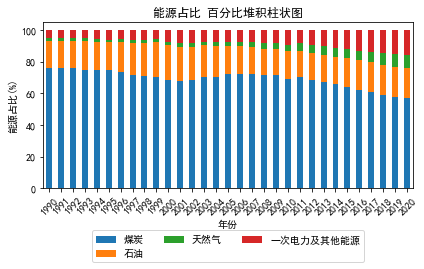

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from pylab import mpl
# 设置显示中文字体
mpl.rcParams["font.sans-serif"] = ["SimHei"]
# 读取Excel数据
df = pd.read_excel('./energy_structure.xlsx')

# 绘制堆积柱状图
ax = df.plot(kind='bar', stacked=True, x='年份', width=0.5)
ax.set_xlabel('年份')
ax.set_ylabel('能源占比(%)')
plt.xticks(rotation=45)
ax.set_title('能源占比 百分比堆积柱状图')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.22), ncol=3)
plt.tight_layout()
plt.show()

从堆积柱状图中可以看出，煤炭消费量整体呈下降趋势，且在大约2007年之后的下降趋势更为明显，而一次电力及其他清洁能源的占比在逐步增大。查阅资料知，2006年，中国在“十一五”规划中首次提出节能减排目标，并推出了一系列行动和政策。中国的能源结构得到优化，政府和企业开始重视新能源和可再生能源的开发利用，提升了非化石能源的比重。
能源结构的优化，一定程度上反映了中国节能减排政策的成效明显，减缓了二氧化碳的排放量。

#### 中美碳排放量变化的比较
我们收集了1990年-2020年中美每年碳排放量总值，与这段时间中国每单位GDP的碳排放量总值。

绘制折线图如下，其中**红色代表碳排放量增加，绿色代表碳排放量减少**： 

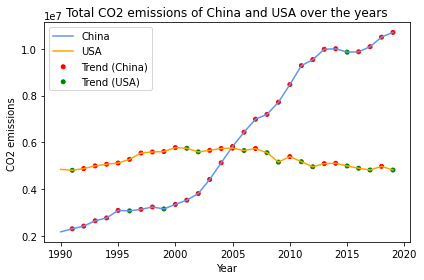

In [ ]:
import csv
import matplotlib.pyplot as plt

# 读取中国1990-2020年的每年总碳排放量数据
with open('co2_emission.csv', newline='') as csvfile:
    reader = csv.reader(csvfile)
    for i in range(45):
        next(reader)
    # 读取中国第一行
    row = next(reader)

# 将数据转换为浮点数
data_china = [float(x) for x in row[34:64]]

# 读取美国1990-2020年的每年总碳排放量数据
with open('co2_emission.csv', newline='') as csvfile:
    reader = csv.reader(csvfile)
    for i in range(256):
        next(reader)
    # 读取美国第一行
    row = next(reader)

# 将数据转换为浮点数
data_usa = [float(x) for x in row[34:64]]

# 绘制折线图
plt.plot(range(1990, 2020), data_china, color='cornflowerblue', label='China')
plt.plot(range(1990, 2020), data_usa, color='orange', label='USA')

# 添加上升和下降趋势的不同颜色
colors_china = []
for i in range(1, len(data_china)):
    if data_china[i] > data_china[i-1]:
        colors_china.append('red')
    else:
        colors_china.append('green')
plt.scatter(range(1991, 2020), data_china[1:],s=16, c=colors_china,label='Trend (China)')

colors_usa = []
for i in range(1, len(data_usa)):
    if data_usa[i] > data_usa[i-1]:
        colors_usa.append('red')
    else:
        colors_usa.append('green')
plt.scatter(range(1991, 2020), data_usa[1:], s=16,c=colors_usa, label='Trend (USA)')

# 添加图例和标题以及坐标轴标签
plt.legend(loc='upper left')
plt.title('Total CO2 emissions of China and USA over the years')
plt.xlabel('Year')
plt.ylabel('CO2 emissions ')
plt.tight_layout()
plt.show()


从折线图中可以看到，中国的CO2排放量的变化十分明显且具有特点，在2000年前增速较慢，在2000-2010快速上升，进入了“节能减排”政策的深化改革阶段之后，也就是2010年左右，增速逐渐变缓。而美国在这段时间的碳排放量的变化不大，波动不明显。

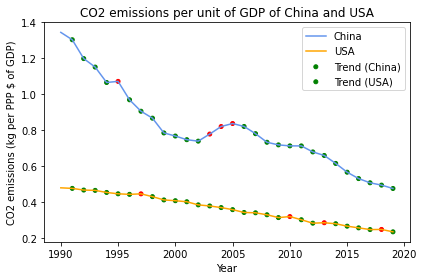

In [ ]:
import csv
import matplotlib.pyplot as plt

# 读取中国1990-2020年的每年总碳排放量数据
with open('co2_emission_kg_per_dollar.csv', newline='') as csvfile:
    reader = csv.reader(csvfile)
    for i in range(45):
        next(reader)
    # 读取中国第一行
    row = next(reader)

# 将数据转换为浮点数
data_china = [float(x) for x in row[34:64]]

# 读取美国1990-2020年的每年总碳排放量数据
with open('co2_emission_kg_per_dollar.csv', newline='') as csvfile:
    reader = csv.reader(csvfile)
    for i in range(256):
        next(reader)
    # 读取美国第一行
    row = next(reader)

# 将数据转换为浮点数
data_usa = [float(x) for x in row[34:64]]

# 绘制折线图
plt.plot(range(1990, 2020), data_china, color='cornflowerblue', label='China')
plt.plot(range(1990, 2020), data_usa, color='orange', label='USA')

# 添加上升和下降趋势的不同颜色
colors_china = []
for i in range(1, len(data_china)):
    if data_china[i] > data_china[i-1]:
        colors_china.append('red')
    else:
        colors_china.append('green')
plt.scatter(range(1991, 2020), data_china[1:], s=16,c=colors_china, label='Trend (China)')

colors_usa = []
for i in range(1, len(data_usa)):
    if data_usa[i] > data_usa[i-1]:
        colors_usa.append('red')
    else:
        colors_usa.append('green')
plt.scatter(range(1991, 2020), data_usa[1:], s=16,c=colors_usa, label='Trend (USA)')

# 添加图例和标题以及坐标轴标签
plt.legend(loc='upper right')
plt.title('CO2 emissions per unit of GDP of China and USA')
plt.xlabel('Year')
plt.ylabel('CO2 emissions (kg per PPP $ of GDP)')
plt.tight_layout()
plt.show()


对于单位GDP的碳排放量，中国也是经历了先下降后上升再下降的阶段，且起伏较大，同样是在2010年左右之后再次下降，与前面的总碳排放量折线图相呼应。美国虽然在逐渐下降，但幅度较小。

### 分析与总结


通过对比中国1990年至2020年的总碳排放量和每年单位GDP对应的碳排放量，可以发现在节能减排政策实施后，中国的总碳排放量呈现逐年增长但增速趋缓的态势，而单位GDP对应的碳排放量则呈现逐年下降的趋势。
这表明中国的节能减排政策在一定程度上发挥了作用，虽然总碳排放量仍在增加，但单位GDP对应的碳排放量却在逐渐降低，说明经济增长和碳排放之间的关系正在发生改变，中国的经济增长方式正在向低碳方向转型。

我们还可以观察到，不论是对于总排放量还是单位GDP对应的碳排放量，美国在过去的几十年中没有明显变化。说明在发达国家中，政策对碳排放量的影响能力较弱。因此，发展中国家应当承担更多的责任。

## 4、总结

综上所述，我们由工业条件，与经济发展以及其他方面的数据及文献得出发展中国家应更多地承担气候变化和减排的责任。

# 小组分工

#### 第一部分：胡博文，杨兆棋（均参与数据收集、绘图与分析的全部过程）
#### 第二部分：郑耀祖，周靖月（均参与数据收集、绘图与分析的全部过程）
#### 第三部分：罗思佳，鲁嘉宁（均参与数据收集、绘图与分析的全部过程）
#### 总结与展示：李天成
#### 各小组成员均参与问题设计